# LINEAR REGRESSION
PyTorch Coding Exercises
Given: 12 October 2022 Deadline: 15 Oct 2022
Activity 1: Learn a Regression Model from Data
With an understanding of the basics of PyTorch, you are ready to start building and training neural network 
models. In this activity, you will create a simple regression model that can predict a student's grade based on 
the number of hours they have studied and slept the day before a test is given.
The network you implement should have two input units (the two input dimensions are hours of study time 
and hours of sleep, as integers between 0-9), three hidden units, and one output unit (the predicted grade on 
a continuous scale between 0-1). Use a sigmoid function as the non-linear activation function in the hidden 
units.
The table below contains the training data you should use (scale these values as necessary). Note the trend 
that is present: more sleep and more study time leads to a higher grade (it's true!). This is the pattern that 
should be learned by the network if it is working correctly.

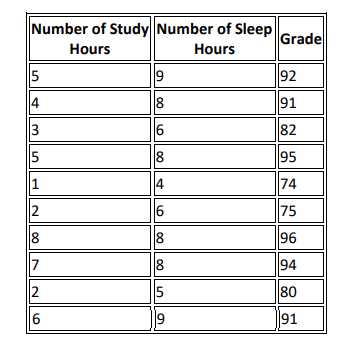

Train your network for 1,000 epochs using a mean sum squared loss function. Your training code should 
incrementally print the loss value as training proceeds. What is the value of the loss in the final epoch? 
Now it's time to test the network. Produce predictions of test performance based on the following sequence of 
study and sleep hours. Your prediction code should print each test instance out to the terminal. Record each 
prediction in an CSV file.

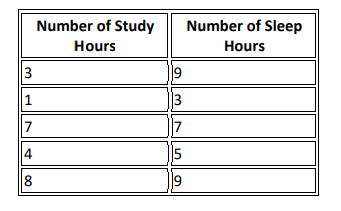


In [84]:
import torch
from torch.utils import data
from torch import nn
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F


In [85]:
input_val=torch.from_numpy(np.array([[5,9],[4,8],[3,6],[5,8],[1,4],[2,6],[8,8],[7,8],[2,5],[6,9]]).astype(np.float32))
output_val = torch.from_numpy(np.array([92,91,82,95,74,75,96,94,80,91]).astype(np.float32))


In [86]:
train_ds = TensorDataset(input_val, output_val)
train_ds.tensors

(tensor([[5., 9.],
         [4., 8.],
         [3., 6.],
         [5., 8.],
         [1., 4.],
         [2., 6.],
         [8., 8.],
         [7., 8.],
         [2., 5.],
         [6., 9.]]),
 tensor([92., 91., 82., 95., 74., 75., 96., 94., 80., 91.]))

In [87]:
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[7., 8.],
         [1., 4.],
         [5., 8.],
         [3., 6.],
         [8., 8.]]), tensor([94., 74., 95., 82., 96.])]

In [88]:
class SimpleNet(nn.Module):
    # Initialize the layers
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 8)
        self.act1 = nn.ReLU() # Activation function
        self.linear2 = nn.Linear(8, 1)
        #self.act2 = nn.ReLU() # Activation function
        #self.linear3 = nn.Linear(3, 1)
    
    # Perform the computation
    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        #x = self.act2(x)
        #x = self.linear3(x)
        return x

In [92]:
model_l = SimpleNet()
optimizer_m = torch.optim.Adam(model_l.parameters(), 1e-1)
#loss_fn = nn.MSELoss()
loss_fn = F.mse_loss


In [90]:
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            # Generate predictions
            pred = model(xb)
            loss = loss_fn(pred, yb)
            # Perform gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()
        print('Training loss: ', loss_fn(pred, yb))

In [93]:
# Train the model for 100 epochs
fit(1500, model_l, loss_fn, optimizer_m)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  # This is added back by InteractiveShellApp.init_path()


Training loss:  tensor(7183.5107, grad_fn=<MseLossBackward0>)
Training loss:  tensor(6474.9570, grad_fn=<MseLossBackward0>)
Training loss:  tensor(5159.3882, grad_fn=<MseLossBackward0>)
Training loss:  tensor(3470.5198, grad_fn=<MseLossBackward0>)
Training loss:  tensor(2424.6946, grad_fn=<MseLossBackward0>)
Training loss:  tensor(1391.2024, grad_fn=<MseLossBackward0>)
Training loss:  tensor(251.9666, grad_fn=<MseLossBackward0>)
Training loss:  tensor(748.1552, grad_fn=<MseLossBackward0>)
Training loss:  tensor(800.9447, grad_fn=<MseLossBackward0>)
Training loss:  tensor(1367.3992, grad_fn=<MseLossBackward0>)
Training loss:  tensor(1264.2390, grad_fn=<MseLossBackward0>)
Training loss:  tensor(501.9005, grad_fn=<MseLossBackward0>)
Training loss:  tensor(651.4993, grad_fn=<MseLossBackward0>)
Training loss:  tensor(592.8486, grad_fn=<MseLossBackward0>)
Training loss:  tensor(752.2596, grad_fn=<MseLossBackward0>)
Training loss:  tensor(938.8061, grad_fn=<MseLossBackward0>)
Training loss:  

In [94]:
# Test the model using test sets
with torch.no_grad():
    X_test = torch.from_numpy(np.array([[3,9],[1,3],[7,7],[4,5],[8,9]]).astype(np.float32))
    prediction = model_l(X_test)


In [95]:
prediction

tensor([[86.9055],
        [84.8935],
        [86.1738],
        [85.5337],
        [86.8400]])

# NAND
Activity 2: Create a Network that can Learn the NAND Operator
Recall from computer architecture that the NAND operator is a universal operator, meaning that any other 
logical operator can be expressed as a combination of NAND operations. Fundamentally, this operator itself is 
the combination of the operators NOT and AND. An interesting task from the perspective of AI is the ability to 
learn such an operator through example.
The network you implement here should have two input units (the two Boolean values that are being 
processed by the NAND operator), two hidden units, and one output unit (the exact output of the NAND 
operator). Use a sigmoid function as the non-linear activation function in the hidden units. The output of your 
code should be the exact answer for any two input bits. Hint: since we are learning NAND from data, some 
post-processing may be needed on the prediction from the last layer of the network.
Your training data for this activity is the truth table for the NAND operator:

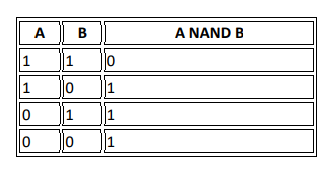

train your network for 1,000 epochs using mean sum squared loss. Your training code should incrementally 
print the loss value as training proceeds. What is the value of the loss in the final epoch? Record the values.
After training, you should be able to reproduce the above truth table exactly by providing A and B as the two 
inputs. Your program should print both inputs and the output for all possibilities. 

In [96]:
import torch
from torch.utils import data
from torch import nn
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

In [97]:
input_val=torch.from_numpy(np.array([[0,0],[0,1],[1,0],[1,1]]).astype(np.float32))
output_val = torch.from_numpy(np.array([1,1,1,0]).astype(np.float32))


In [98]:
train_ds = TensorDataset(input_val, output_val)
train_ds.tensors

(tensor([[0., 0.],
         [0., 1.],
         [1., 0.],
         [1., 1.]]), tensor([1., 1., 1., 0.]))

In [99]:
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[1., 0.]]), tensor([1.])]

In [100]:
class SimpleNet(nn.Module):
    # Initialize the layers
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 2)
        self.act1 = nn.Sigmoid() # Activation function
        self.linear2 = nn.Linear(2, 1)
        self.act2 = nn.Sigmoid() # Activation function
        #self.linear3 = nn.Linear(3, 1)
    
    # Perform the computation
    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        x = self.act2(x)
        #x = self.linear3(x)
        return x

In [101]:
F.sigmoid(torch.tensor(0))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(0.5000)

In [102]:
model_l = SimpleNet()
optimizer_m = torch.optim.SGD(model_l.parameters(), 1e-1)
#loss_fn = nn.MSELoss()
loss_fn = F.mse_loss


In [103]:
fit(1000, model_l, loss_fn, optimizer_m)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  # This is added back by InteractiveShellApp.init_path()


Training loss:  tensor(0.3273, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.3417, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.1706, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.1610, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.1600, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.1602, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.1536, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.1474, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.1274, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.1295, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.1182, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.1139, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.4525, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.4585, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.1042, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.1012, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.0985, grad_fn=<MseLossBackward0

In [104]:
with torch.no_grad():
    X_test = torch.from_numpy(np.array([[0,0],[1,1],[1,0],[1,1],[0,1]]).astype(np.float32))
    #Y_test = mnist_test.test_labels.to(device)

    prediction = model_l(X_test)

In [105]:
prediction.round().int()

tensor([[1],
        [0],
        [1],
        [0],
        [1]], dtype=torch.int32)

# BANK FRAUD SECTION
Activity 3: Build Three different Multi-Layer Perceptron Models for Bank Fraud Identification
You are given a CSV file with Bank Fraud Identification dataset that contains 20k+ transactions with 112 
features (numerical) and 1 Target Feature (targets).
In this activity, you will create a simple regression model using three different variants of Multi-layer 
Perceptron Models can predict a Bank Fraud based on the various features available. Compare the 
performance of the models on the test data.
First Spilt your dataset in the ratio of 80% for Training and remaining 20% for testing.
Input of the model will take up 112 features and outputs a Binary value of either 0 or 1.
You are free to use any loss function or optimizers to train your model.
[link text](https://https://github.com/HKannan23/Pytorch_codes/blob/main/Datasets_file/fraud_detection_bank_dataset.csv)

In [126]:
import pandas as pd
import torch
from torch.utils import data
from torch import nn
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

In [127]:
csv_read = pd.read_csv("/content/fraud_detection_bank_dataset.csv")

In [106]:
#pd_slicing = csv_read.iloc[:,1:113]
#np_arr = pd_slicing.to_numpy()
#input_val=torch.from_numpy(np_arr).float()


In [128]:
csv_read = csv_read.sample(frac=1, axis=0).reset_index(drop=True)

In [107]:
#pd_slicing.shape

In [129]:
tr_len = round(len(pd_slicing)*80/100)

In [130]:
test_len = round(len(pd_slicing)*20/100)

In [ ]:
#pd_slicing = csv_read.iloc[1:tr_len,1:113]
#np_arr = pd_slicing.to_numpy()
#input_val=torch.from_numpy(np_arr).float()

In [108]:
#pd_slicing.head()

In [ ]:
#pd_slicing2 = csv_read.iloc[:,-1]
#np_arr2 = pd_slicing2.to_numpy()
#output_val = torch.from_numpy(np_arr2).float()

In [109]:
#pd_slicing2.head()

In [110]:
#csv_read.head()

In [111]:
#input_val.shape

In [113]:
#output_val

In [112]:
#tr_ds = TensorDataset(input_val, output_val)
#tr_ds.tensors

In [ ]:
#pd_slicing3 = csv_read.iloc[tr_len+1:tr_len+test_len,1:113]
#np_arr = pd_slicing3.to_numpy()
#input_val1=torch.from_numpy(np_arr).float()

In [ ]:
#pd_slicing4 = csv_read.iloc[tr_len+1:tr_len+test_len,-1]
#np_arr = pd_slicing4.to_numpy()
#output_val1=torch.from_numpy(np_arr).float()

In [114]:
#test_ds = TensorDataset(input_val1, output_val1)
#test_ds.tensors

In [131]:
pd_slicing = csv_read.iloc[:,1:113]
np_arr = pd_slicing.to_numpy()
input_val2=torch.from_numpy(np_arr).float()

pd_slicing = csv_read.iloc[:,-1]
np_arr = pd_slicing.to_numpy()
output_val2 = torch.from_numpy(np_arr).float()

tensor_ds = TensorDataset(input_val2, output_val2)

In [132]:
train_ds, test_ds = torch.utils.data.random_split(tensor_ds, [16374, 4094])

In [133]:
batch_size = 100
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[8.0000e+00, 3.6500e+02, 9.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
          1.0000e+00],
         [2.0000e+00, 2.4300e+02, 1.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
          6.2000e+01],
         [0.0000e+00, 2.1000e+01, 0.0000e+00,  ..., 1.0000e+00, 0.0000e+00,
          1.0500e+02],
         ...,
         [7.0000e+00, 2.0000e+02, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
          2.0000e+01],
         [0.0000e+00, 2.5000e+01, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
          9.6000e+01],
         [1.0000e+01, 2.1540e+03, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
          6.6000e+01]]),
 tensor([0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
         0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
         0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
         1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
         1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0

In [134]:
class SimpleNet(nn.Module):
    # Initialize the layers
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(112, 20)
        self.act1 = nn.ReLU() # Activation function
        self.linear2 = nn.Linear(20, 15)
        self.act2 = nn.ReLU() # Activation function
        self.linear3 = nn.Linear(15, 7)
        self.act3 = nn.ReLU() # Activation function
        self.linear4 = nn.Linear(7, 1)
        self.act4 = nn.Sigmoid() # Activation function
        
        
    
    # Perform the computation
    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        x = self.act2(x)
        x = self.linear3(x)
        x = self.act3(x)
        x = self.linear4(x)
        x = self.act4(x)
        return x

In [135]:
model_l = SimpleNet()
optimizer_m = torch.optim.SGD(model_l.parameters(), 1e-5)
#loss_fn = nn.MSELoss()
loss_fn = F.mse_loss

In [136]:
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            # Generate predictions
            pred = model(xb)
            loss = loss_fn(pred, yb)
            # Perform gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()
        print('Training loss: ', loss_fn(pred, yb))

In [137]:
fit(1000, model_l, loss_fn, optimizer_m)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Using a target size (torch.Size([74])) that is different to the input size (torch.Size([74, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Using a target size (torch.Size([74])) that is different to the input size (torch.Size([74, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  # This is added back by InteractiveShellApp.init_path()


Training loss:  tensor(0.2459, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.2319, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.2511, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.2223, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.2055, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.2545, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.2303, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.2347, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.1884, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.2630, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.2039, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.2446, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.2343, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.2346, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.2192, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.2193, grad_fn=<MseLossBackward0>)
Training loss:  tensor(0.2462, grad_fn=<MseLossBackward0

In [138]:
batch_size = 1
test_dl = DataLoader(test_ds, batch_size, shuffle=True)
next(iter(test_dl))

[tensor([[  5.0000, 756.0000,   0.0000,   2.0000,   0.0000,   0.0000,  -1.0000,
            5.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            1.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   8.0000,  78.0000,   1.0000,   1.0000,  33.0000,   0.0000,
            1.0000,   2.0000,   1.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  20.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  10.0000,   0.0000,
            2.0000,   2.0000,   0.0000,   0.0000,   0.0000,  34.0000,   0.0000,
            0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,   0.0000, 770.1795,  39.0000,   3.0000,
            0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000, 

In [140]:
error_s = 0
with torch.no_grad():
  for x_tst, y_tst in test_dl:
    #print(x_tst.shape)
    prediction = model_l(x_tst)
    #print(prediction.round(), "True estimate:", y_tst)
    error_s += abs(prediction.round()-y_tst)

error = error_s/len(test_ds)
print("Accuracy:", 1-error)

Accuracy: tensor([[0.7406]])
